   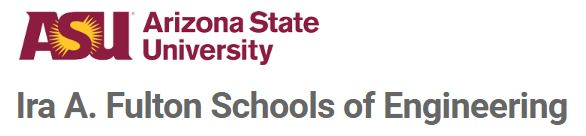 
   
   # CSE 578 - Data Visualization
     Income Prediction of Individuals

# Data Exploration

This code is used for data exploration and feature engineering.


In [1]:
# packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data settings
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
          'hours-per-week', 'native-country', 'income']
data_filename = 'data/adult.data'
raw_data = pd.read_csv(data_filename, names=columns, na_values=['?', ' ?'], sep=', ',engine='python')
raw_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Missing and Duplicate Values

In [3]:
raw_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Drop rows with unknown values
raw_data = raw_data.dropna(how='any')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# drop duplicates
raw_data = raw_data.drop_duplicates()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Statistics

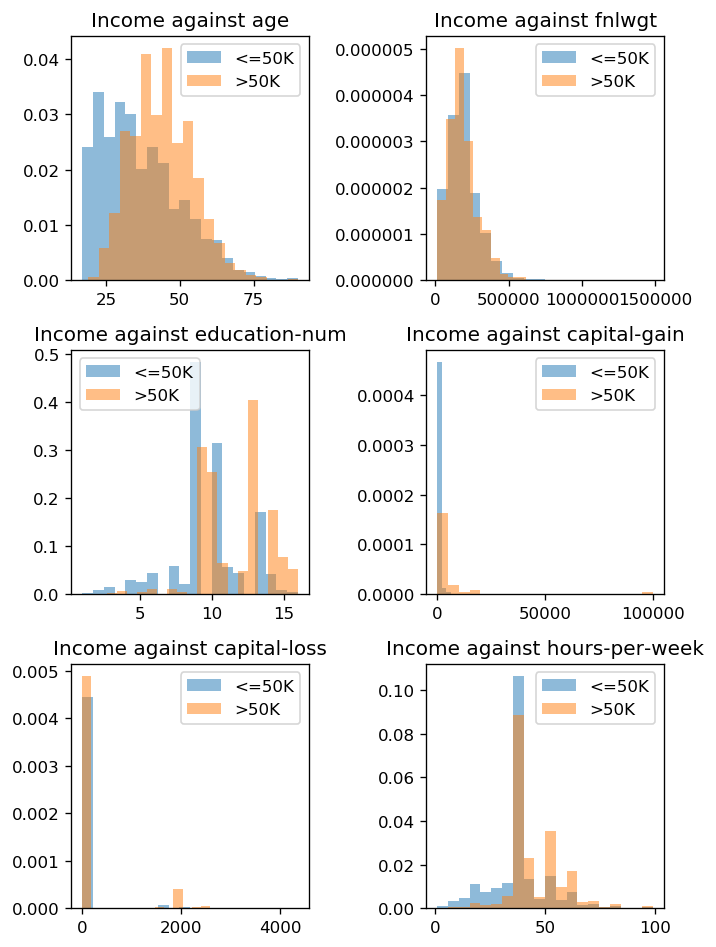

In [7]:
# Continuous Variables
continuous_variables = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(dpi=120, figsize=(6, 8))

for i, var_name in enumerate(continuous_variables):
    plt.subplot(3, 2, i+1)
    
    income_0 = raw_data.loc[raw_data['income']=='<=50K', var_name]
    income_1 = raw_data.loc[raw_data['income']=='>50K', var_name]

    plt.hist(income_0, bins=20, label='<=50K', alpha=0.5, density=True)
    plt.hist(income_1, bins=20, label='>50K', alpha=0.5, density=True)
    
    plt.legend()
    plt.title('Income against {}'.format(var_name))
    
plt.tight_layout()

### Some findings on Continuous Variables
+ The older the age, the higher the income.
+ fnlwgt might not be a good feature for analysing.
+ The longer the education-num, the higher the income.
+ There might be outliers in capital-gain and capital-loss.
+ One with larger hours-per-week is more likely to have higher income.
+ 44.99 % of the candidates have not been to college
+ 38.25% of the candidates have no college degree and earning less than 50k.
+ 11.97% candidates have completed masters and bachelors but have less than 50k salary
+ 2.16% candidates working more than 60 hours with less than 50K salary

<Figure size 432x288 with 0 Axes>

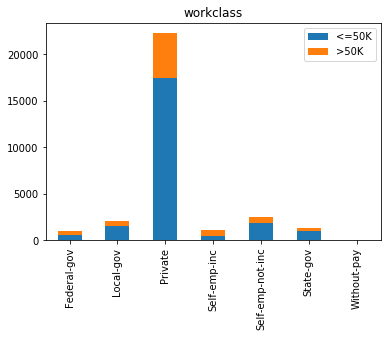

<Figure size 432x288 with 0 Axes>

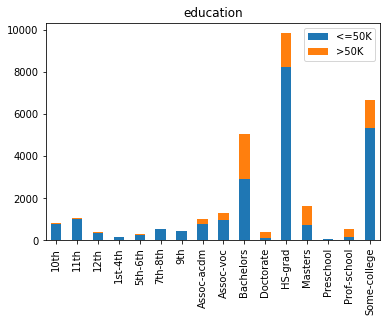

<Figure size 432x288 with 0 Axes>

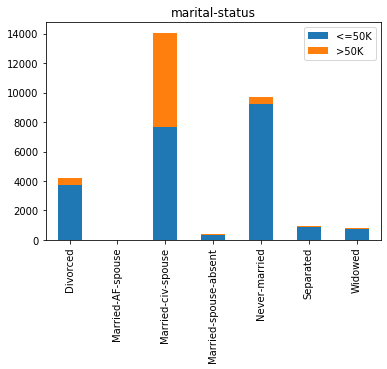

<Figure size 432x288 with 0 Axes>

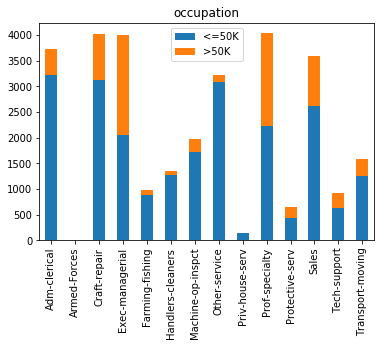

<Figure size 432x288 with 0 Axes>

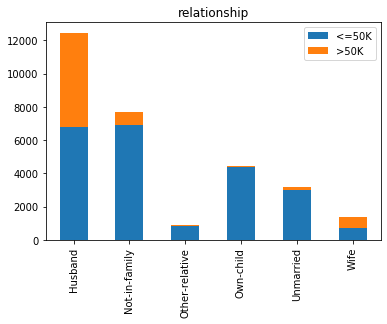

<Figure size 432x288 with 0 Axes>

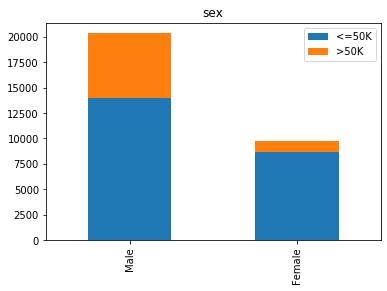

<Figure size 432x288 with 0 Axes>

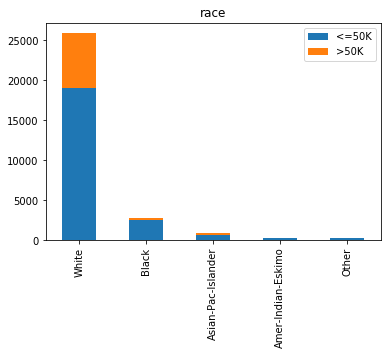

<Figure size 432x288 with 0 Axes>

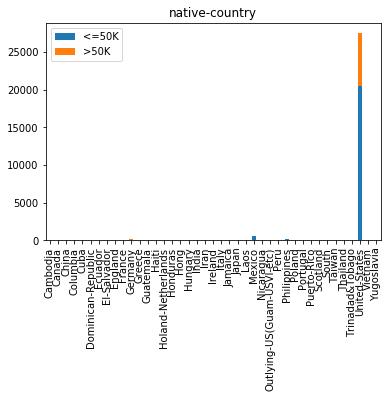

In [8]:
# Category Variables
category_variables = ['workclass', 'education', 'marital-status',
           'occupation', 'relationship', 'sex', 'race', 'native-country']
for i, var_name in enumerate(category_variables):
    plt.figure()
    
    income_0 = raw_data.loc[raw_data['income']=='<=50K', var_name].value_counts()
    income_1 = raw_data.loc[raw_data['income']=='>50K', var_name].value_counts()
    df = pd.DataFrame({'<=50K': income_0, '>50K': income_1})
    
    df.plot(kind='bar', stacked=True)

    plt.legend()
    plt.title('{}'.format(var_name))
    plt.show()

### Some findings on Categorical Data
+ One with private workclass is more likely to have higher income.
+ Most high income samples are Married-civ-spouse.
+ Sex is an important feature.
+ Most samples are from US and remove the country featrue may improve performance.
+ Exec-managerical earns highest whereas the Priv-house-serv earns lowest and they dont earn more than 50K


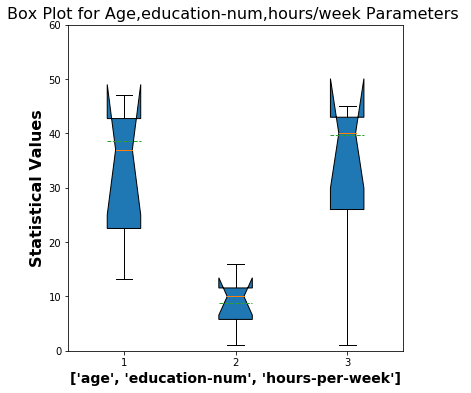

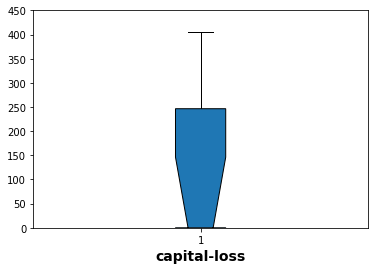

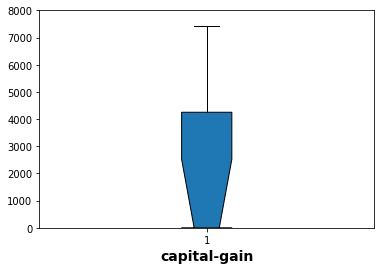

In [9]:
#box plot for Quantile values
boxplotVal=raw_data.describe()
multibox=[]
continuous_variables = ['age', 'education-num', 'hours-per-week']
#Collection
for i, var_name in enumerate(continuous_variables):
    multibox.append(boxplotVal.loc["mean":"max",var_name])

fig1,ax1= plt.subplots(figsize=(6,6))
ax1.set_title('Box Plot for Age,education-num,hours/week Parameters ',fontsize=16)
plt.ylabel('Statistical Values',fontsize=16,fontweight='bold')
plt.xlabel(continuous_variables,fontsize=14,fontweight='bold')
plt.ylim(0,60)
bplots=plt.boxplot(multibox,showfliers=True,notch=True,showmeans=True,showcaps=True,meanline=True,autorange=True,patch_artist=True)
plt.show()
clplots=plt.boxplot(boxplotVal.loc["mean":"max","capital-loss"],showfliers=True,notch=True,showmeans=True,showcaps=True,meanline=True,autorange=True,patch_artist=True)
plt.xlabel("capital-loss",fontsize=14,fontweight='bold')
plt.ylim(0,450)
plt.show()
cgplots=plt.boxplot(boxplotVal.loc["mean":"max","capital-gain"],showfliers=True,notch=True,showmeans=True,showcaps=True,meanline=True,autorange=True,patch_artist=True)
plt.xlabel("capital-gain",fontsize=14,fontweight='bold')
plt.ylim(0,8000)
plt.show()

+ Age,Hours per week has normal distribution values
+ Capital loss, Capital Gain does not have normal distribution value Hence these cannot be considered as feature for analysing.

## Encode
Convert strings to one-hot or integer.

In [10]:
data = raw_data.copy()

# income: >50K to 1, <=50K to 0
data['income'] = data['income'].map({'>50K': 1, '<=50K': 0})

# Sex: Male to 1, Female to 0
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})

# Convert workclass, marital-status, occupation, relationship, race, native-country to one-hot code
dummies_workclass = pd.get_dummies(data['workclass'], prefix='workclass')
dummies_education = pd.get_dummies(data['education'], prefix='education')
dummies_marital = pd.get_dummies(data['marital-status'], prefix='marital')
dummies_occupation = pd.get_dummies(data['occupation'], prefix='occupation')
dummies_relationship = pd.get_dummies(data['relationship'], prefix='relationship')
dummies_race = pd.get_dummies(data['race'], prefix='race')
# dummies_country = pd.get_dummies(data['native-country'], prefix='country')

data = pd.concat([data, dummies_workclass, dummies_education, dummies_marital,
                  dummies_occupation, dummies_relationship, dummies_race], axis=1)
data.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'], axis=1, inplace=True)

data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,77516,13,1,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,0,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [11]:
data.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,...,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,0.675736,1092.841202,88.439928,40.934703,0.249046,0.031288,0.068582,...,0.255947,0.029497,0.148047,0.106540,0.046651,0.009489,0.029663,0.093434,0.007664,0.859750
std,13.131426,1.056586e+05,2.548738,0.468107,7409.110596,404.445239,11.978753,0.432468,0.174099,0.252747,...,0.436400,0.169197,0.355153,0.308532,0.210893,0.096952,0.169657,0.291044,0.087212,0.347252
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,1.784170e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,47.000000,2.376045e+05,13.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Baseline Model
Build LR, Decision Tree model as Baseline.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# data
Y = data['income'].values  # just income value 
X = data.drop('income', axis=1).values  # Columns values
x_min = X.min()
x_max = X.max()
X_norm = (X - x_min) / (x_max - x_min)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


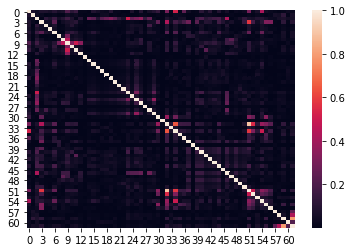

In [13]:
df = pd.DataFrame(X_norm)

sns.heatmap(abs(df.corr()))

In [14]:
kf = KFold(n_splits=5)

# LR
acc_list = []
f1_list = []
clf = LogisticRegression(C=2, penalty='l2')
for train_index, test_index in kf.split(X_norm):
    # Split data
    train_x, train_y = X_norm[train_index], Y[train_index]
    test_x, test_y = X_norm[test_index], Y[test_index]
    # train model
    clf.fit(train_x, train_y)
    
    # predict
    y_pred = clf.predict(test_x)
    
    # metric
    acc_list.append(accuracy_score(test_y, y_pred))
    f1_list.append(f1_score(test_y, y_pred))
print('LR\tAcc:{:.3f}\tF1:{:.3f}'.format(np.mean(acc_list), np.mean(f1_list)))

LR	Acc:0.756	F1:0.039


In [15]:
kf = KFold(n_splits=5,shuffle=True)

# DT
acc_list = []
f1_list = []
clf = DecisionTreeClassifier(criterion='gini', max_depth=6)
for train_index, test_index in kf.split(X_norm):
    # Split data
    train_x, train_y = X_norm[train_index], Y[train_index]
    test_x, test_y = X_norm[test_index], Y[test_index]
    
    # train model
    clf.fit(train_x, train_y)
    
    # predict
    y_pred = clf.predict(test_x)
    
    # metric
    acc_list.append(accuracy_score(test_y, y_pred))
    f1_list.append(f1_score(test_y, y_pred))
print('DCT\tAcc:{:.3f}\tF1:{:.3f}'.format(np.mean(acc_list), np.mean(f1_list)))

DCT	Acc:0.848	F1:0.637


# Parameter Tuning

C=0.001	Acc:0.751	F1:0.000	AUC:0.500
C=0.01	Acc:0.751	F1:0.000	AUC:0.500
C=0.1	Acc:0.777	F1:0.321	AUC:0.588
C=1	Acc:0.774	F1:0.319	AUC:0.586
C=2	Acc:0.777	F1:0.409	AUC:0.621
C=3	Acc:0.776	F1:0.409	AUC:0.621
C=4	Acc:0.776	F1:0.408	AUC:0.620
C=5	Acc:0.776	F1:0.408	AUC:0.620


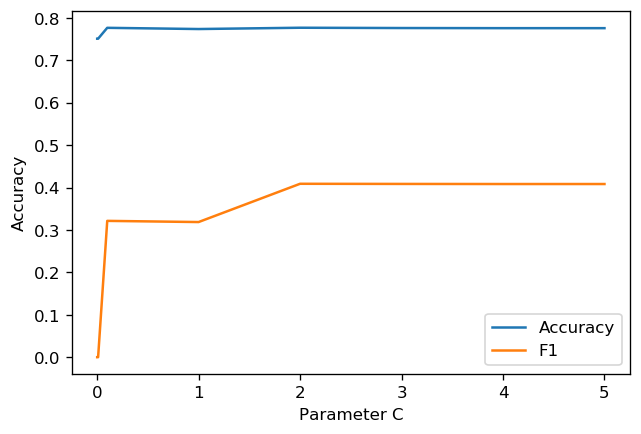

In [16]:
# find optimal parameters of LR
from sklearn.metrics import roc_curve, auc

C_list = [0.001, 0.01, 0.1, 1, 2, 3, 4, 5]
acc_list_all = []
f1_list_all = []

kf = KFold(n_splits=5)

for c in C_list:
    acc_list = []
    f1_list = []
    auc_list = []
    clf = LogisticRegression(C=c, penalty='l1', solver='liblinear', class_weight='balanced')
    for train_index, test_index in kf.split(X_norm):
        # Split data
        train_x, train_y = X_norm[train_index], Y[train_index]
        test_x, test_y = X_norm[test_index], Y[test_index]
        # train model
        clf.fit(train_x, train_y)

        # predict
        y_pred = clf.predict(test_x)

        # metric
        acc_list.append(accuracy_score(test_y, y_pred))
        f1_list.append(f1_score(test_y, y_pred))
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        auc_list.append(roc_auc)
        
    mean_acc = np.mean(acc_list)
    mean_f1 = np.mean(f1_list)
    mean_auc = np.mean(auc_list)
    print('C={}\tAcc:{:.3f}\tF1:{:.3f}\tAUC:{:.3f}'.format(c, mean_acc, mean_f1, mean_auc))
    
    acc_list_all.append(mean_acc)
    f1_list_all.append(mean_f1)

plt.figure(dpi=120)
plt.plot(C_list, acc_list_all, label='Accuracy')
plt.plot(C_list, f1_list_all, label='F1')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Parameters of LR
The optimal hyperparameter C for LogisticRegression is 2, under L1 regularization. The ratio of positive and negative samples is about 1:3. The performance of model will be improved if balance the class weight. 

In [17]:
# features importance

clf = LogisticRegression(C=2, penalty='l1', solver='liblinear', class_weight='balanced')

clf.fit(X_norm, Y)

feature_names = list(data.columns)
feature_names.remove('income')

for feature, coef in zip(feature_names, clf.coef_[0]):
    print('{:40}{:.6f}'.format(feature, coef))

age                                     0.000000
fnlwgt                                  -0.286291
education-num                           0.000000
sex                                     0.000000
capital-gain                            400.082082
capital-loss                            442.628777
hours-per-week                          0.000000
workclass_Federal-gov                   0.000000
workclass_Local-gov                     0.000000
workclass_Private                       0.000000
workclass_Self-emp-inc                  0.000000
workclass_Self-emp-not-inc              0.000000
workclass_State-gov                     0.000000
workclass_Without-pay                   0.000000
education_10th                          0.000000
education_11th                          0.000000
education_12th                          0.000000
education_1st-4th                       0.000000
education_5th-6th                       0.000000
education_7th-8th                       0.000000
education_9th  

In [18]:
from sklearn.model_selection import train_test_split
clf = LogisticRegression(C=2, penalty='l1', solver='liblinear', class_weight='balanced')

train_x, test_x, train_y, test_y = train_test_split(X_norm[:, 4:6], Y)

clf.fit(train_x, train_y)

y_pred = clf.predict(test_x)

print(accuracy_score(test_y, y_pred))

0.7842070338420704


## Important Features
If just use the feature `capital-gain` and `capital-loss`, an accuracy of 0.775 can be achieved.

0.625621797695566


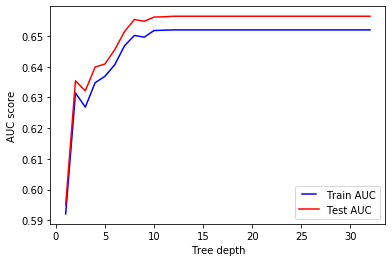

In [19]:
# AUC(Area Under Curve) as evaluation metric using DTC's Max_Depth
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D

false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(train_x, train_y)
    train_pred = dt.predict(train_x)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(test_x)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

Using Evaluation metric, ROC=0.66 (i.e) almost 66% of performance is achieved.AUC(Area Under Curve), a classification problem,The train data fits test data up to a certain tree depth and model overfits after certain tree depth.